Step 1: Import Dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Step: Load dataset

In [8]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\ML\cars.csv",header=None)
df.columns=['buying','maint','doors','persons','lug_boot','safety','classes']
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.shape

(1728, 7)

In [11]:
#check category level of all columns
for col in df.columns:
    print('-----------------{}---------------------'.format(col))
    print(df[col].value_counts())
    print()

-----------------buying---------------------
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

-----------------maint---------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

-----------------doors---------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

-----------------persons---------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64

-----------------lug_boot---------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

-----------------safety---------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64

-----------------classes---------------------
classes
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In the above values counts we can see in two column we have category and numbers so we need to replace the categories withthe numbers using label encoder

Step: Data Preprocessing

In [12]:
#check missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

No missing value in the above data

In [13]:
#check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   classes   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


we need to perform label encoder on all the column contain object data type

In [14]:
#apply label encoder to convert categories into numeric values
le = LabelEncoder()

for x in df.columns:
    print(x)
    df[x]=le.fit_transform(df[x])
    le_name= dict(zip(le.classes_,le.transform(le.classes_)))
    print('----------------------------')
    print("Feature:",x)
    print('Mapping:',le_name)

buying
----------------------------
Feature: buying
Mapping: {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
maint
----------------------------
Feature: maint
Mapping: {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
doors
----------------------------
Feature: doors
Mapping: {'2': 0, '3': 1, '4': 2, '5more': 3}
persons
----------------------------
Feature: persons
Mapping: {'2': 0, '4': 1, 'more': 2}
lug_boot
----------------------------
Feature: lug_boot
Mapping: {'big': 0, 'med': 1, 'small': 2}
safety
----------------------------
Feature: safety
Mapping: {'high': 0, 'low': 1, 'med': 2}
classes
----------------------------
Feature: classes
Mapping: {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Step 4: Separate X & Y

In [18]:
X = df.iloc[ :, :-1] #independent variables
y = df.iloc [ :, -1] #dependent variables

Step 5: Data Spliting

In [21]:
#split he data into teat & train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

#verify spliting data
print('Total Data:',df.shape)
print('Train X:',X_train.shape)
print('Train y:',y_train.shape)
print('Test X:',X_test.shape)
print('Test y:',y_test.shape)

Total Data: (1728, 7)
Train X: (1209, 6)
Train y: (1209,)
Test X: (519, 6)
Test y: (519,)


Step 6: Data Normalization

In [26]:
# perform data normalisation

# create object for scaler
scaler = MinMaxScaler()

#fir the train data on scaler object
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


Note: In this data set we can see all the values from all the columns and rows are ranging from 0 to 5 so there is no exteremne high & low values so thats why we dont need to perform standarization and normalisation.

In [28]:
#compare normal & scale data
print(X_train.iloc[0])
print(X_train_scale[0])

buying      0
maint       0
doors       1
persons     2
lug_boot    0
safety      0
Name: 593, dtype: int32
[0.         0.         0.33333333 1.         0.         0.        ]


Step 7: Build Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
#create a model
classifier = LogisticRegression()

#fitting training data  in the matrix
classifer.fit_transform()

Step 7: Build Model

In [36]:
#create model object with default parameter
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
model_dt.get_depth()

14

In [39]:
#prediction on Test data
y_pred= model_dt.predict(X_test)

#print(list(zip(y_test,ypred)))

In [45]:
#confusion matrix {'acc':0, 'good':1,'unacc':2,'vgood':3}
print('-------Confusion matrix---------')
print(confusion_matrix(y_test, y_pred))
print()
print('----------Accuracy Score--------')
print(accuracy_score(y_test,y_pred))
print()
print('---------Classification Report-----')
print(classification_report(y_test,y_pred))

-------Confusion matrix---------
[[ 99   2   1   0]
 [  4  17   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]

----------Accuracy Score--------
0.9845857418111753

---------Classification Report-----
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.98       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.98      0.98      0.98       519



Tuning Model

In [49]:
#criterion = 'gini',
#splitter='best',
#max_depth = None,
#min_samples_split=2,
#min_samples_leaf = 1,
#min_weight_fraction_leaf= 0.0,
#max_features=None,
#random_state=None,
#min_impurity_decred = 0.0,
#class_weight=None,
#ccp_alpa=0.0,

model_dt2 = DecisionTreeClassifier(criterion = 'gini',
                                   random_state=10,
                                   min_samples_leaf = 10,
                                   min_samples_split = 2,
                                   max_leaf_nodes=35,
                                   max_depth=None)

#fit the model on the data and predict he values
model_dt2.fit(X_train, y_train)
print('Dept: ', model_dt2.get_depth())

#prediction on Test data
y_pred2= model_dt2.predict(X_test)

#confusion matrix {'acc':0, 'good':1,'unacc':2,'vgood':3}
print('-------Confusion matrix---------')
print(confusion_matrix(y_test, y_pred))
print()
print('----------Accuracy Score--------')
print(accuracy_score(y_test,y_pred))
print()
print('---------Classification Report-----')
print(classification_report(y_test,y_pred))

Dept:  10
-------Confusion matrix---------
[[ 99   2   1   0]
 [  4  17   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]

----------Accuracy Score--------
0.9845857418111753

---------Classification Report-----
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.98       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.98      0.98      0.98       519



In [53]:
# feature importance of all columns
#total will be 1

print(list(zip(df.columns, model_dt.feature_importances_)))

[('buying', 0.14929199779103852), ('maint', 0.2524437370839914), ('doors', 0.059129889035013566), ('persons', 0.19624639961416407), ('lug_boot', 0.09713332412056555), ('safety', 0.24575465235522678)]


In [55]:
df.columns[:-1]

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

CPU times: total: 6.62 s
Wall time: 7.27 s


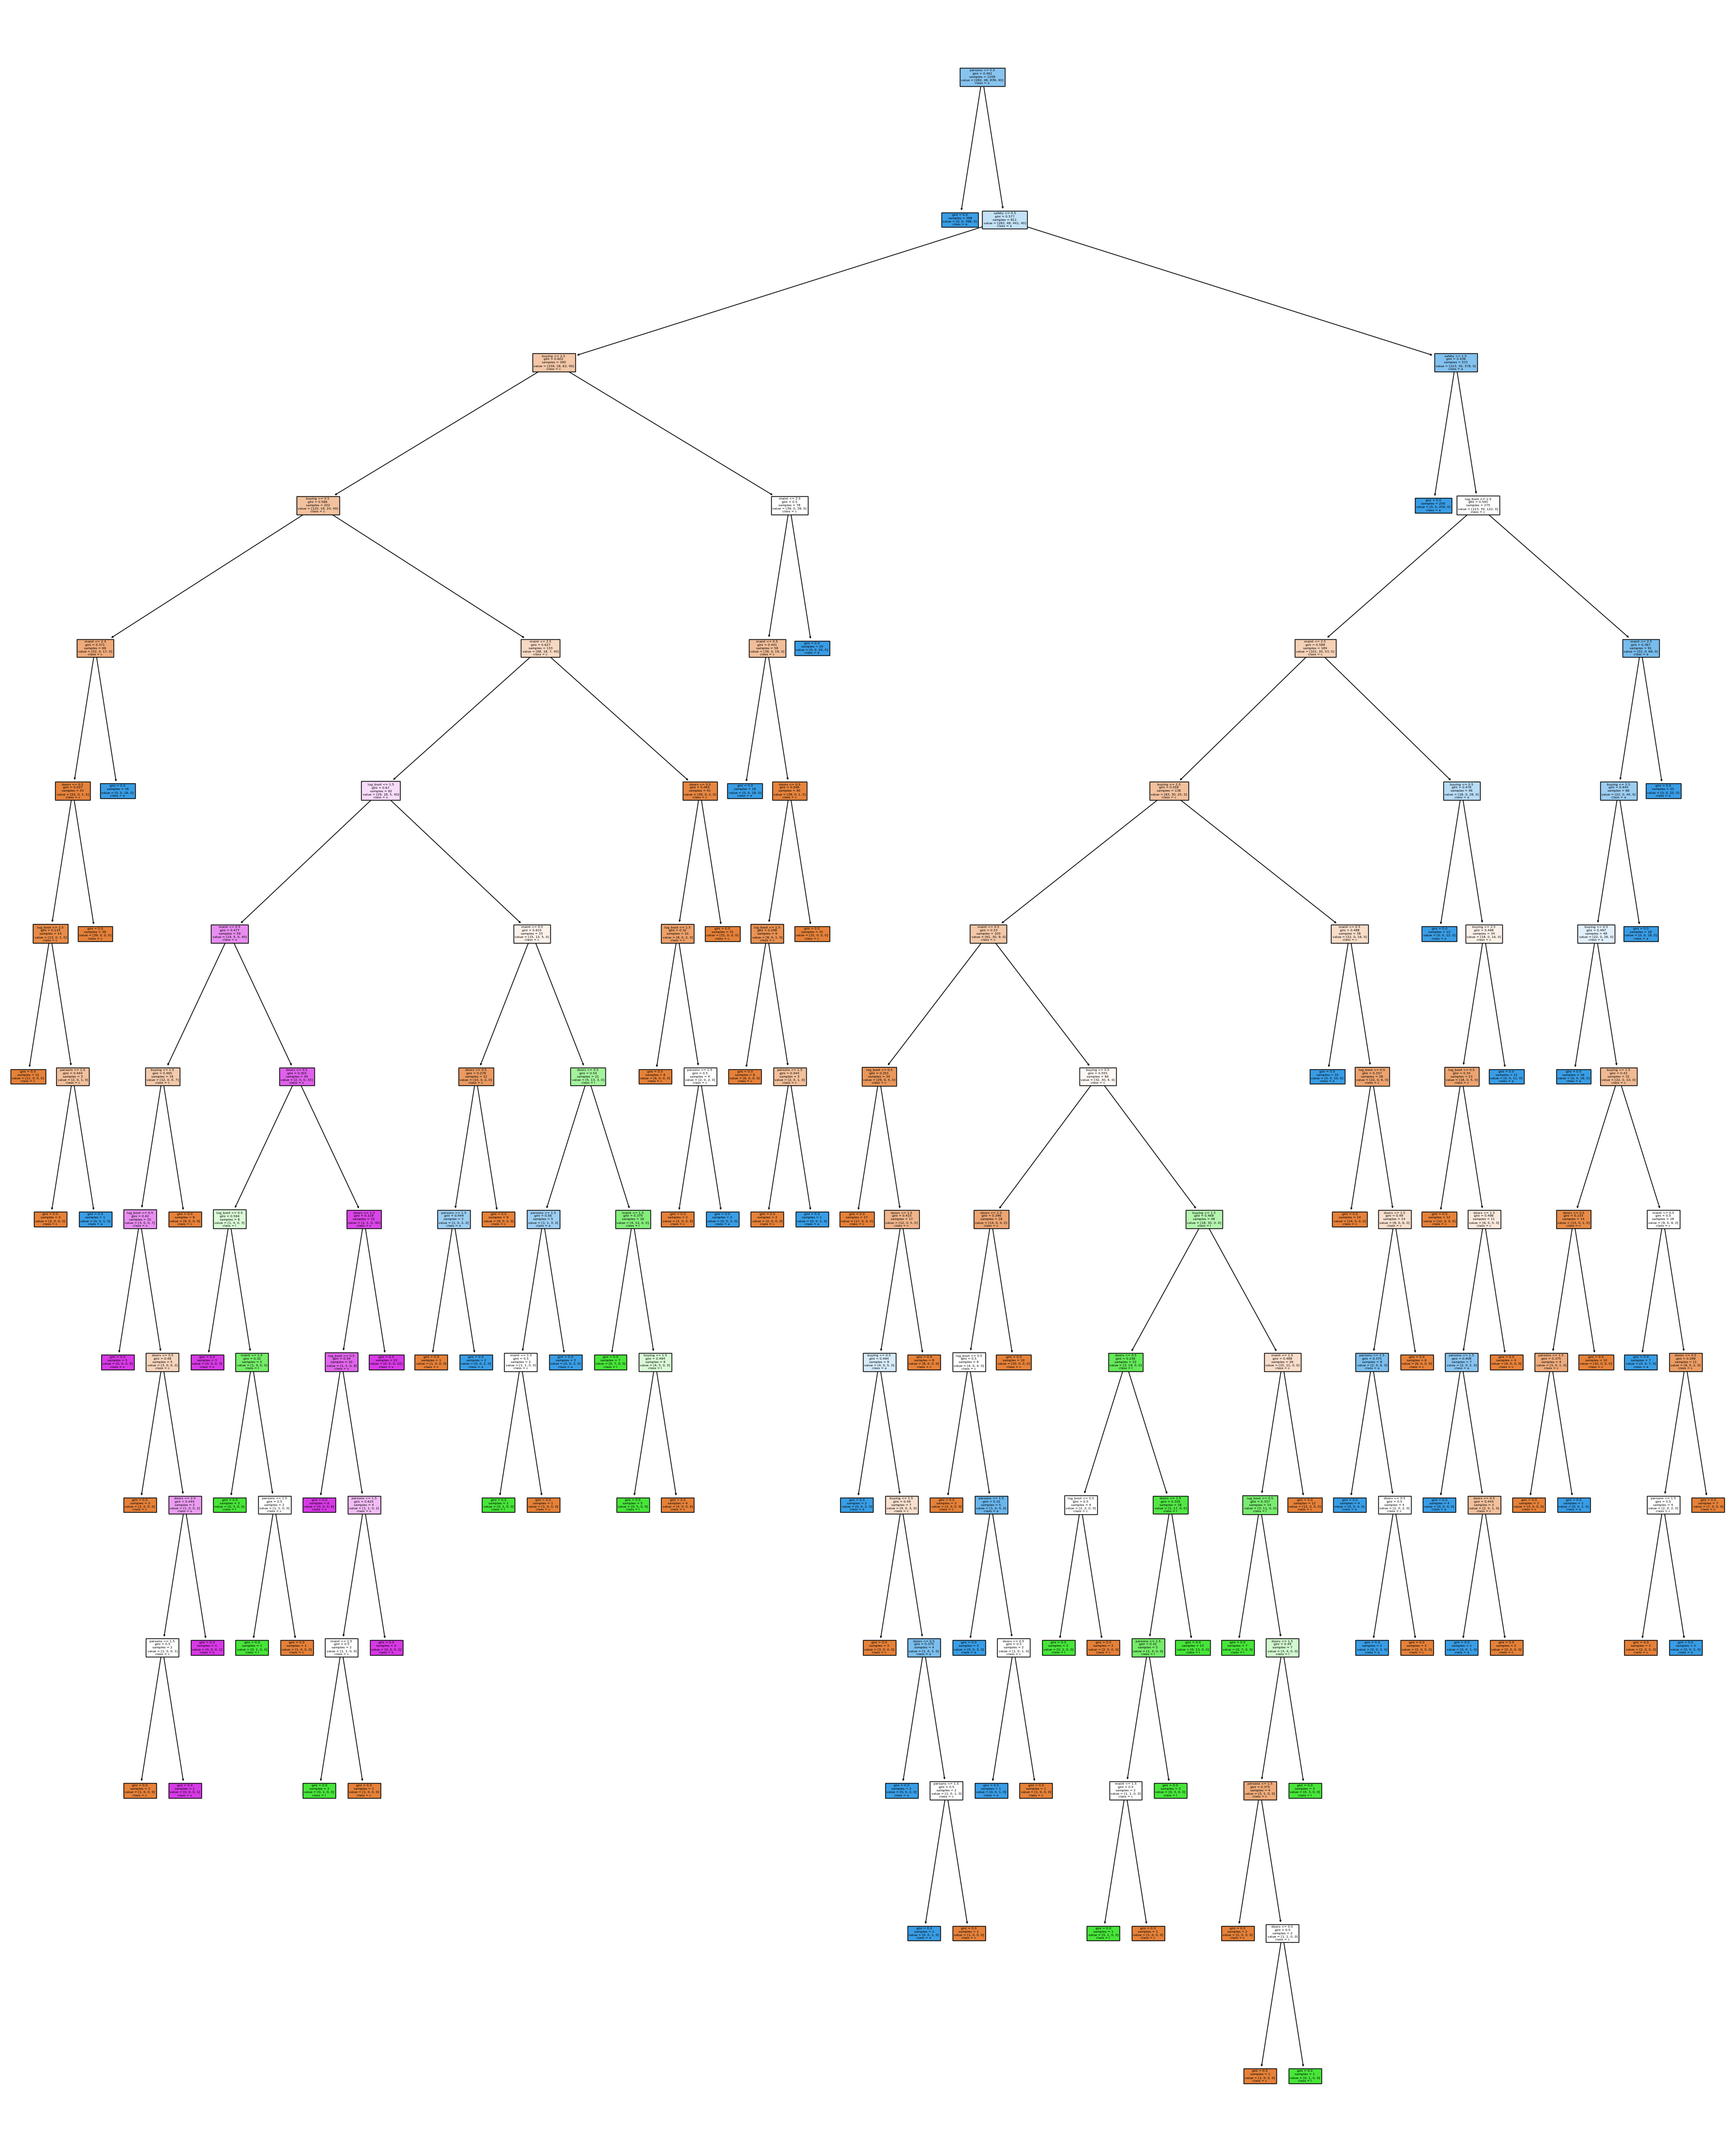

In [63]:
%%time

#it will take 5 t0 6 min to create image.
fig= plt.figure(figsize=(40,50))
dot_data= tree.plot_tree(model_dt,
                        feature_names=list(df.columns[:-1]),
                         class_names=list(df.columns[-1]),
                         filled=True)
plt.savefig('base_model.jpeg')

CPU times: total: 6.73 s
Wall time: 7.16 s


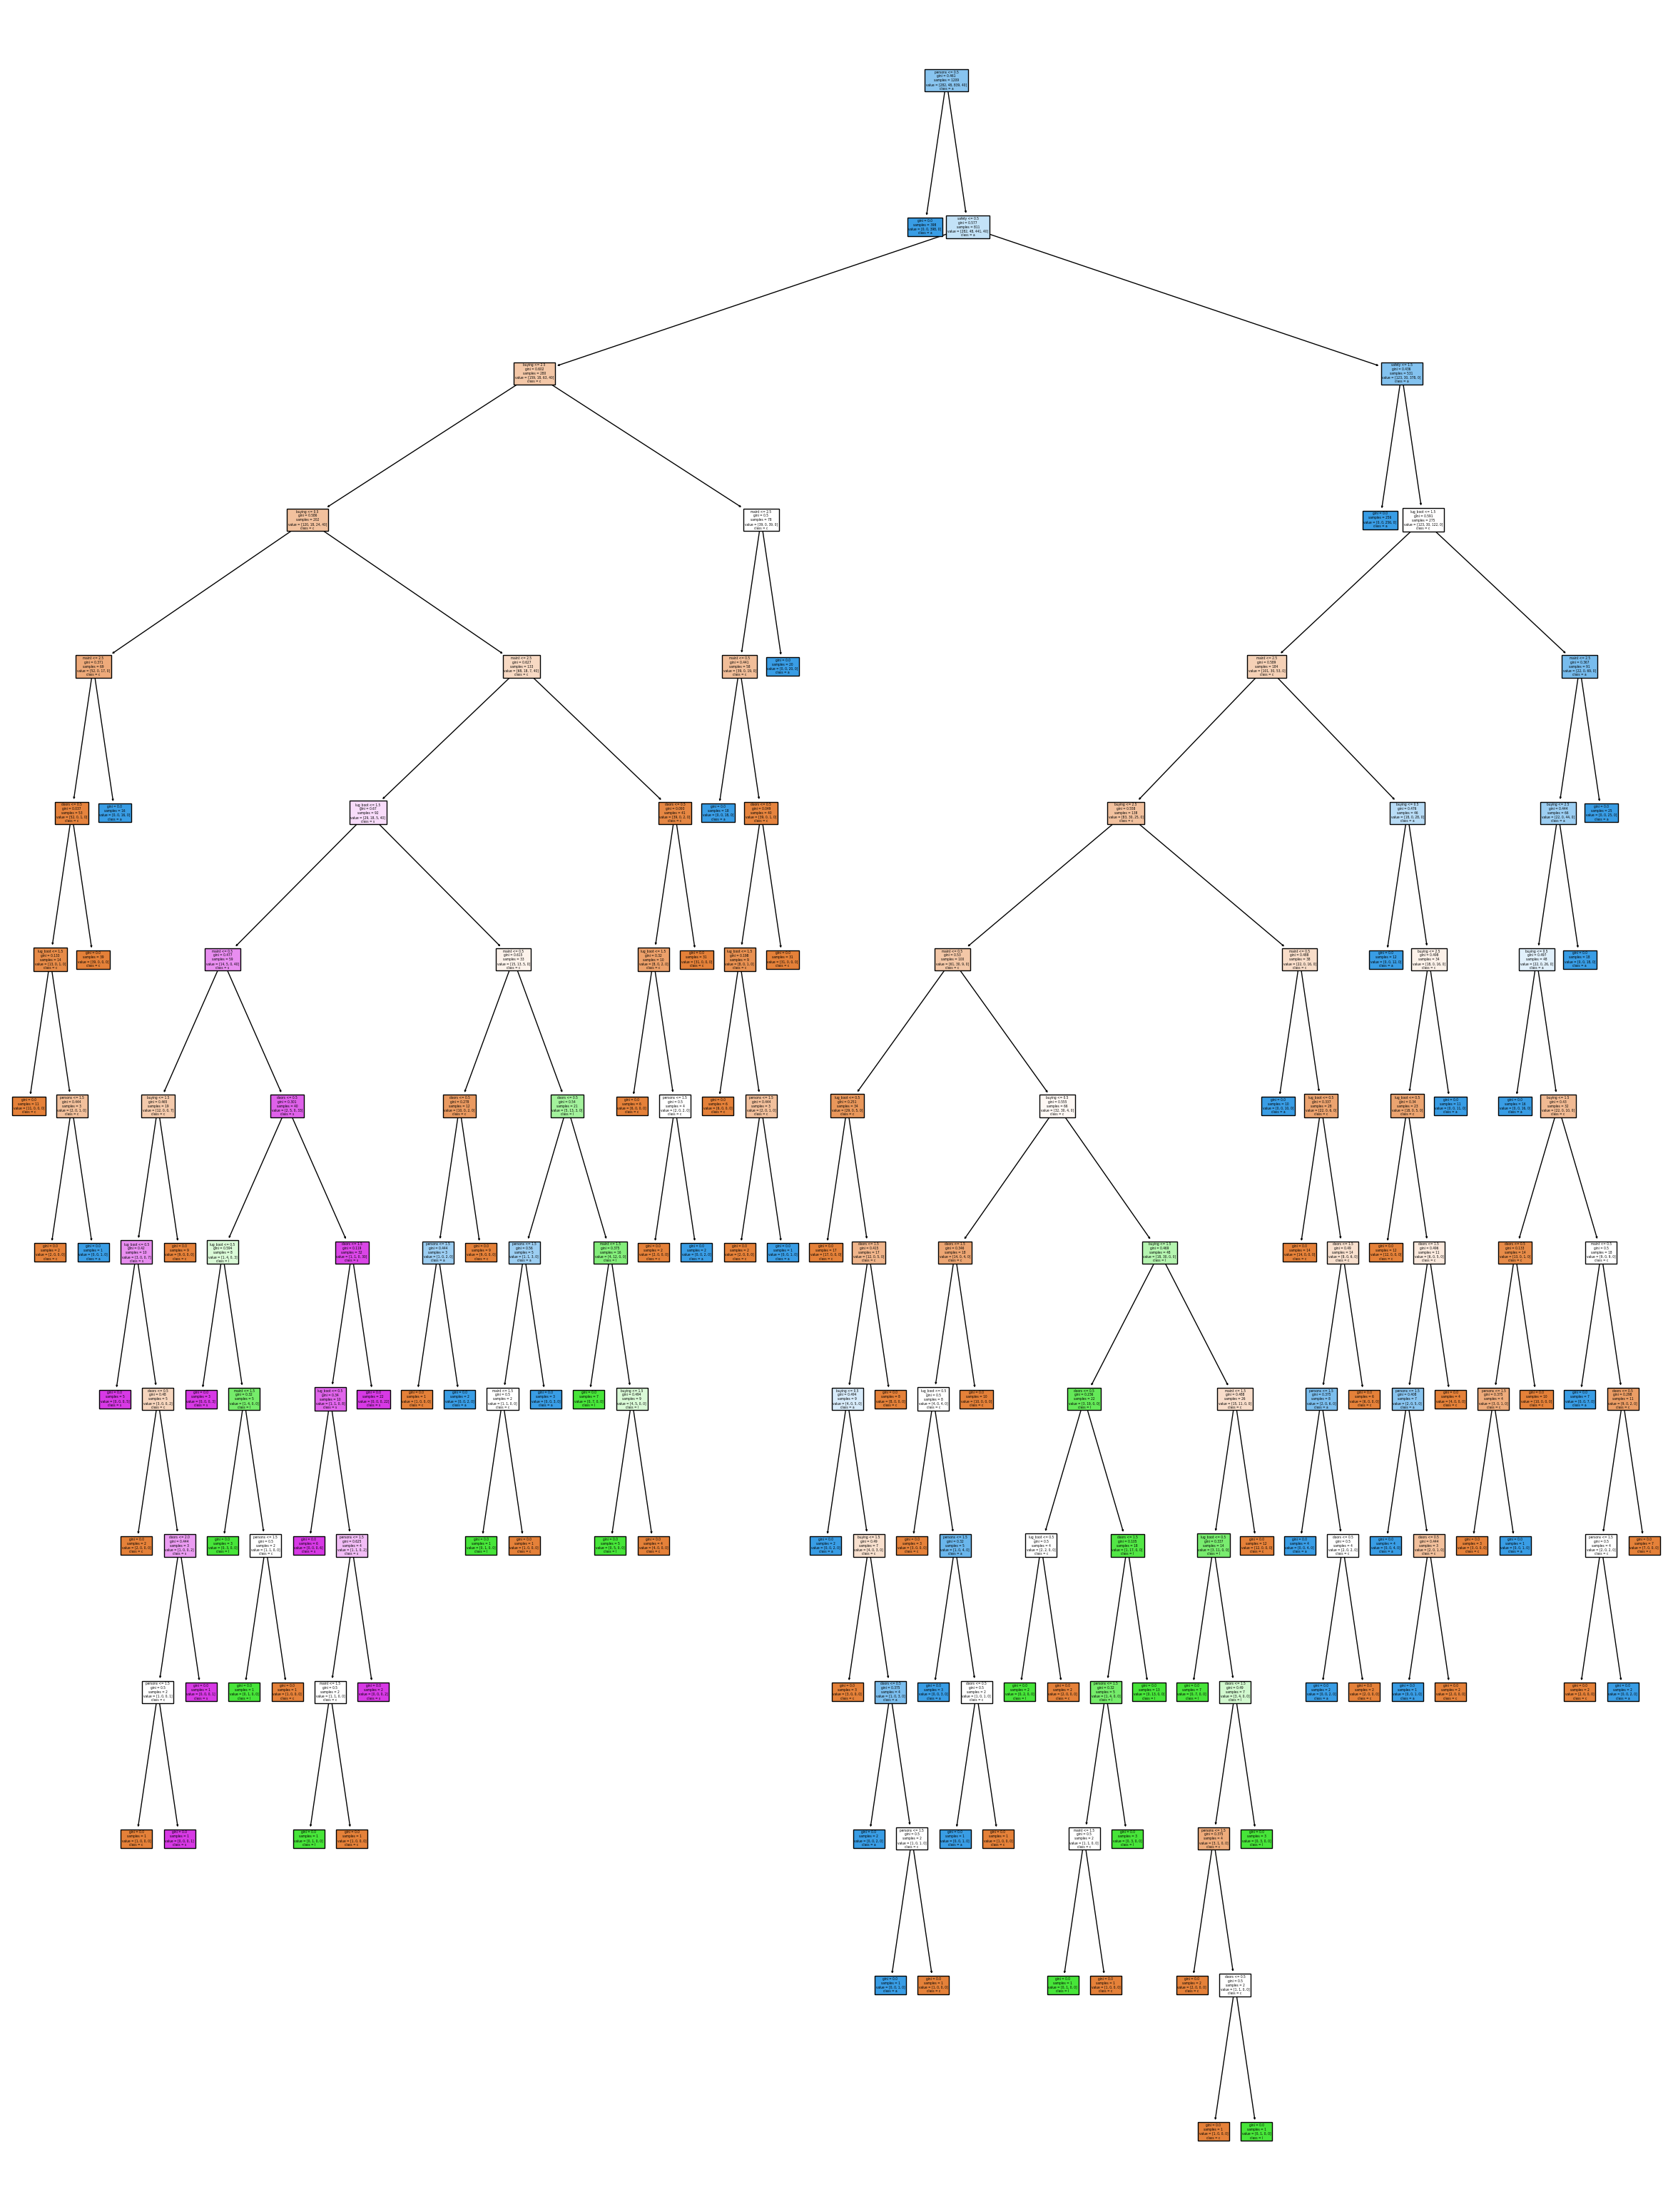

In [65]:
%%time

#it will take 5 t0 6 min to create image.
fig= plt.figure(figsize=(30,40))
dot_data= tree.plot_tree(model_dt,
                        feature_names=list(df.columns[:-1]),
                         class_names=list(df.columns[-1]),
                         filled=True)
plt.savefig('tune_model.jpeg')